In [6]:
import pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris

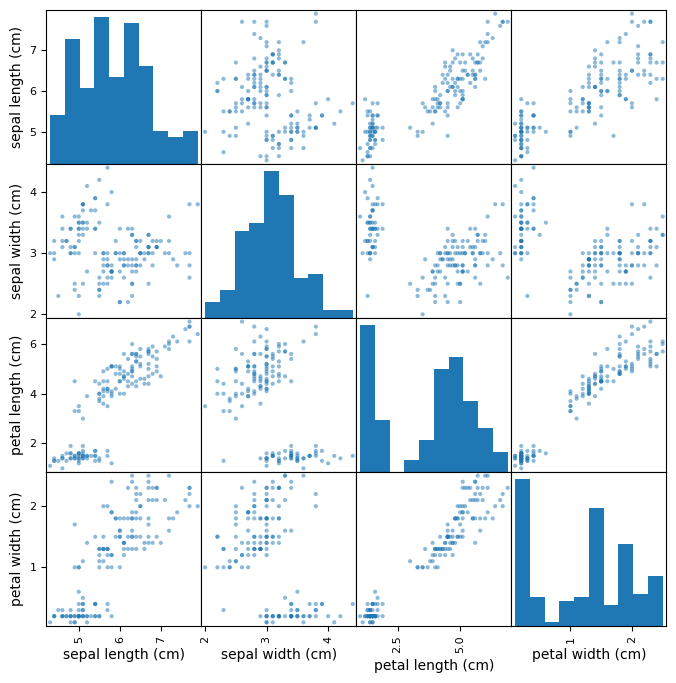

In [7]:
iris = load_iris()
dataset = pandas.DataFrame(iris.data, columns=iris.feature_names)
dataset['class'] = iris.target

scatter_matrix(dataset.drop('class', axis=1), figsize=(8,8))
pyplot.show()

In [8]:
X_train, X_validation, Y_train, Y_validation = train_test_split(iris.data, iris.target, test_size=0.20, random_state=7)

models = [
    ('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC(gamma='auto'))
]

# Evaluation
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print(f'{name}: {cv_results.mean():.4f}')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.9750
LDA: 0.9750
KNN: 0.9833
CART: 0.9750
NB: 0.9750
SVM: 0.9917


In [9]:

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = ensemble.predict(X_validation)

# Final Metrics
print("Overall Accuracy:", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(Y_validation, predictions))
print("\nClassification Report:\n", classification_report(Y_validation, predictions))

Overall Accuracy: 0.9

Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


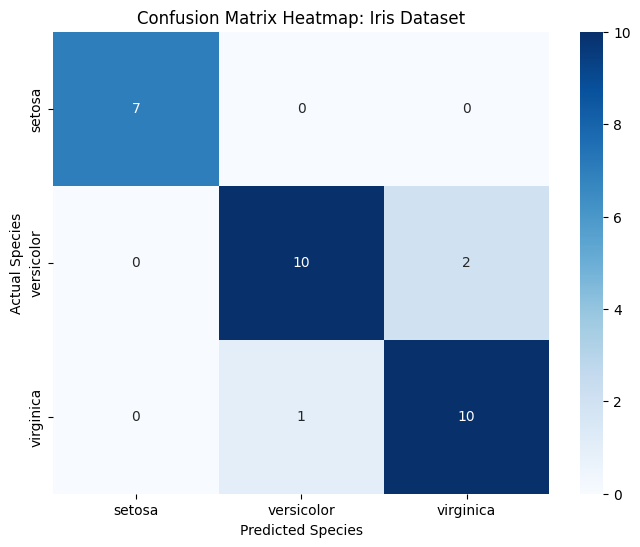

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_validation, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.title('Confusion Matrix Heatmap: Iris Dataset')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.show()